## As a first proof of concept, we optimize the linear model y=mx+b subject to m>0.

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Here are the functions "from the math"

In [148]:
def MSELoss(p,X,y): # This is the 1-dimensional MSE loss in the original coordinates.
    N = len(y)
    term = 1/N*sum([(y[i]-p[0]*X[i]-p[1])**2 for i in range(N)])
    return term

In [149]:
def myGrad1(p,X,y): # This assumes that the original loss function is the MSE.
    N = len(y)
    s1 = sum([np.exp(p[0])*X[i]**2 + p[1]*X[i] + X[i]**2 - X[i]*y[i] for i in range(N)])
    s2 = sum([np.exp(p[0])*X[i]+X[i]+p[1]-y[i] for i in range(N)])
    v1 = 2*np.exp(-p[0])*s1
    v2 = 2*s2
    ans = np.array([v1/N,v2/N])
    return ans # the components of the gradient of the MSE in our coordinates.

In [150]:
def myUpdate1(p,v):
    
    def vMove(p2,v2,t):
        # initial v velocity: c3
        # initial v position: c4
        c3 = (-v2)
        c4 = p2
        return c3*t + c4
    
    def uMove(p1,v1,t):
        # initial u-velocity: c1/c2
        # initial u position: ln(c2)
        # p1 = ln(c2); c2=exp(p1)
        # v1 = c1/c2; c1 = exp(p1)*v1
        c1 = np.exp(p1)*(-v1)
        #print(c1)
        c2 = np.exp(p1)
        #print(c2)
        return np.log(c1*t+c2)
    
    ans = np.array([uMove(p[0],v[0],1.0), vMove(p[1],v[1],1.0)])
    return ans

In [151]:
def gradUpdate1(p,X,y,eta):
    
    gradP = myGrad1(p,X,y)
    #print(gradP)
    gradPlr = eta*gradP
    #print(gradPlr)
    newP = myUpdate1(p,gradPlr)
    return newP

## Now we need to implement Gradient Descent (in batches?) Here.

In [152]:
def SGD(X, y, pt, Update, epochs, batchsize=64, lr=0.01): # p0 is the point where the algo is initialized (Do we need this?).
    # Implement SGD, with one change. Typically, points/parameters are updated as follows:
    # newPoint = oldPoint - eta*grad(f(oldPoint)).
    # Now, the update happens as follows:
    # newPoint = gradUpdate1(oldPoint)
	pts = [pt]
	for i in range(epochs):
		pt = Update(pt,X,y,lr)
		pts.extend([pt]) # Track the path in the original coordinates.
	return pts

## Sample with dummy data: make sure the "math checks out."

In [153]:
Xtest = np.linspace(0,10,100)
ytest = [x+1 for x in Xtest] # So the model is y= 1*x+1.

In [154]:
"""
pt = [2,0] # Initialize (new coordinates). This is (exp(2)+1, 0) in the original coordinates.
pts = [pt]
epochs = 1200 # How long to train for?
myeta = 0.01 # Careful with the learning rate: if it's too big, you can run into a "bad point!"
for i in range(epochs):
    pt = gradUpdate1(pt,Xtest,ytest,myeta)
    pts.extend([pt]) # Track the path in the original coordinates.
"""
pts = SGD(Xtest, ytest, [2,0], gradUpdate1, 1200)
opts = [np.array([np.exp(p[0])+1,p[1]]) for p in pts]

In [155]:
losses = [MSELoss(p,Xtest,ytest) for p in opts]

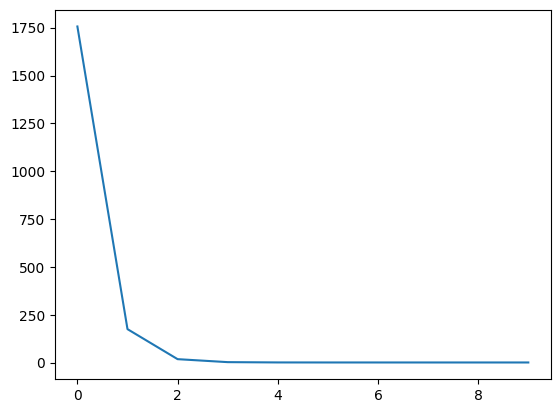

In [156]:
# Watch the loss for the first few iterations drop.
plt.plot(losses[0:10])

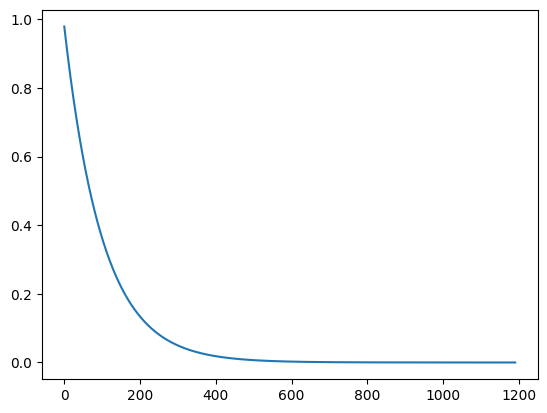

In [157]:
# The loss continues to drop.
plt.plot(losses[10:])

In [158]:
# Here is our approximate solution:
print(opts[-1])

[1.00079155 0.99473565]


# Dataset Exploration

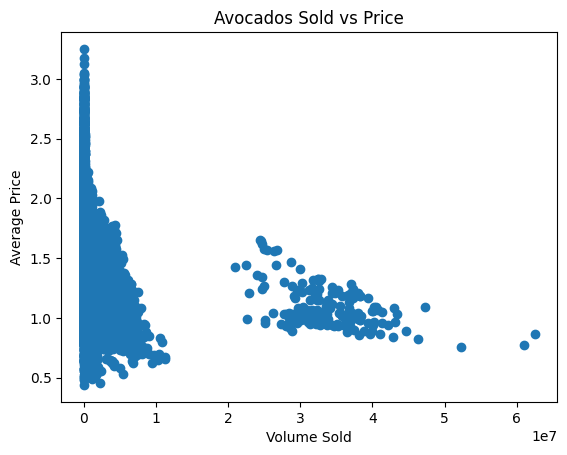

In [159]:
df = pd.read_csv('data/avocado.csv')
df = df[['AveragePrice', 'Total Volume']].copy()

plt.scatter(x=df['Total Volume'], y=df['AveragePrice'])
plt.xlabel("Volume Sold")
plt.ylabel("Average Price")
plt.title("Avocados Sold vs Price")
plt.show()

In [160]:
df2 = df = pd.read_csv('data/avocado.csv')

In [161]:
df2

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
